# Gaussian Discriminant Analysis

Code for LDA plots

## LDA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

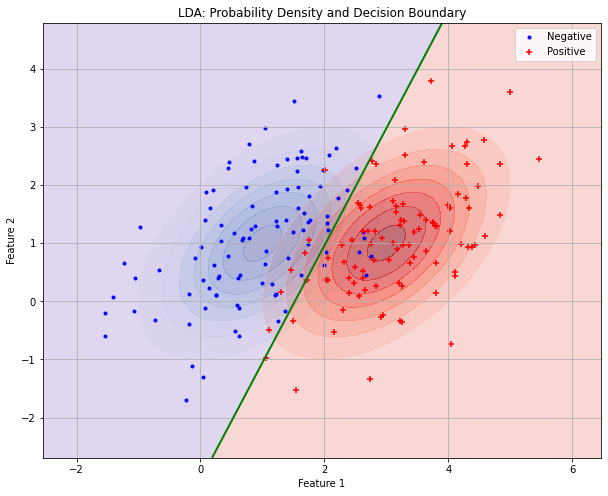

In [42]:

# Generate synthetic dataset
np.random.seed(0)
mean1 = [1, 1]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [3, 1]
cov2 = [[1, 0.5], [0.5, 1]]

n1_samples = 100
n2_samples = 100
n_samples = n1_samples + n2_samples
X1 = np.random.multivariate_normal(mean1, cov1, n1_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n2_samples)
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n1_samples), np.ones(n2_samples)))

# Fit LDA model
lda = LinearDiscriminantAnalysis(priors = [n1_samples/n_samples, n2_samples/n_samples] )
lda.fit(X, y)

# Define grid for heat map
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute probability density function (PDF) for each class
pdf1 = multivariate_normal(mean=mean1, cov=cov1).pdf(grid)
pdf2 = multivariate_normal(mean=mean2, cov=cov2).pdf(grid)
pdf1 = pdf1.reshape(xx.shape)
pdf2 = pdf2.reshape(xx.shape)

# Compute decision boundary
decision_boundary = lda.decision_function(grid).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8), facecolor='white')

# Plot the PDF of each class
plt.contourf(xx, yy, pdf1, alpha=0.5, cmap='Blues')
plt.contourf(xx, yy, pdf2, alpha=0.5, cmap='Reds')

# Highlight the decision boundary
plt.contour(xx, yy, decision_boundary, levels=[0], linewidths=2, colors='green')
plt.contourf(xx, yy, decision_boundary, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.1)

# Scatter plot of the data points
plt.scatter(X1[:, 0], X1[:, 1], c='blue', marker='.', label='Negative')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='+', label='Positive')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA: Probability Density and Decision Boundary')
plt.legend()
plt.grid(True)

plt.savefig('lda_plot.png', dpi=300, bbox_inches='tight')
plt.show()


## QDA

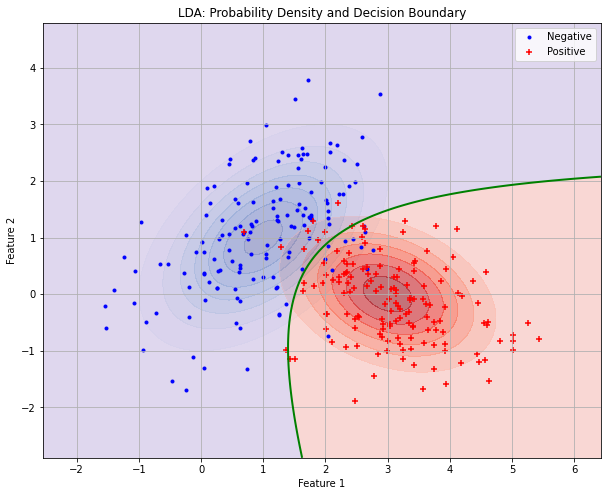

In [40]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generate synthetic dataset
np.random.seed(0)
mean1 = [1, 1]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [3, 0]
cov2 = [[0.8, -0.2], [-0.2, 0.5]]

n1_samples = 150
n2_samples = 150
n_samples = n1_samples + n2_samples
X1 = np.random.multivariate_normal(mean1, cov1, n1_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n2_samples)
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n1_samples), np.ones(n2_samples)))

# Fit LDA model
lda = QuadraticDiscriminantAnalysis(priors = [n1_samples/n_samples, n2_samples/n_samples] )
lda.fit(X, y)

# Define grid for heat map
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute probability density function (PDF) for each class
pdf1 = multivariate_normal(mean=mean1, cov=cov1).pdf(grid)
pdf2 = multivariate_normal(mean=mean2, cov=cov2).pdf(grid)
pdf1 = pdf1.reshape(xx.shape)
pdf2 = pdf2.reshape(xx.shape)

# Compute decision boundary
decision_boundary = lda.decision_function(grid).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8), facecolor='white')

# Plot the PDF of each class
plt.contourf(xx, yy, pdf1, alpha=0.5, cmap='Blues')
plt.contourf(xx, yy, pdf2, alpha=0.5, cmap='Reds')

# Highlight the decision boundary
plt.contour(xx, yy, decision_boundary, levels=[0], linewidths=2, colors='green')
plt.contourf(xx, yy, decision_boundary, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.1)

# Scatter plot of the data points
plt.scatter(X1[:, 0], X1[:, 1], c='blue', marker='.', label='Negative')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='+', label='Positive')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA: Probability Density and Decision Boundary')
plt.legend()
plt.grid(True)

plt.savefig('qda_plot.png', dpi=300, bbox_inches='tight')
plt.show()
